## Analysis

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("ncr_ride_bookings.csv")

In [4]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


<Axes: xlabel='Avg CTAT', ylabel='Booking Value'>

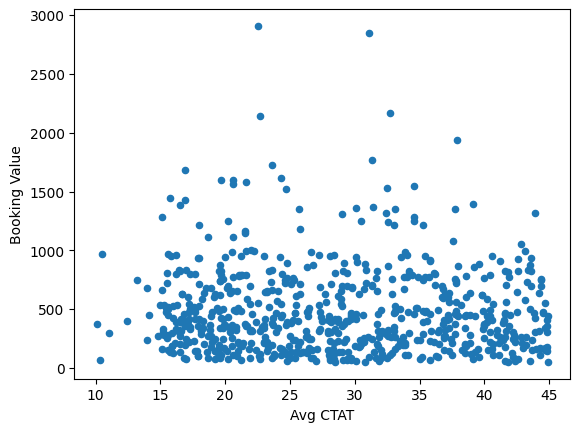

In [11]:
df[["Booking Value","Avg CTAT"]].iloc[:1000].plot(kind="scatter", x= 'Avg CTAT', y= 'Booking Value')

<Axes: xlabel='Avg CTAT', ylabel='Ride Distance'>

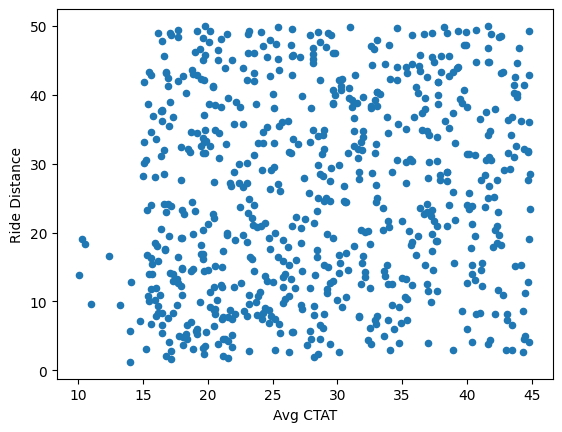

In [13]:
df[["Ride Distance","Avg CTAT"]].iloc[:1000].plot(kind="scatter", x= 'Avg CTAT', y= 'Ride Distance')

<Axes: xlabel='Payment Method'>

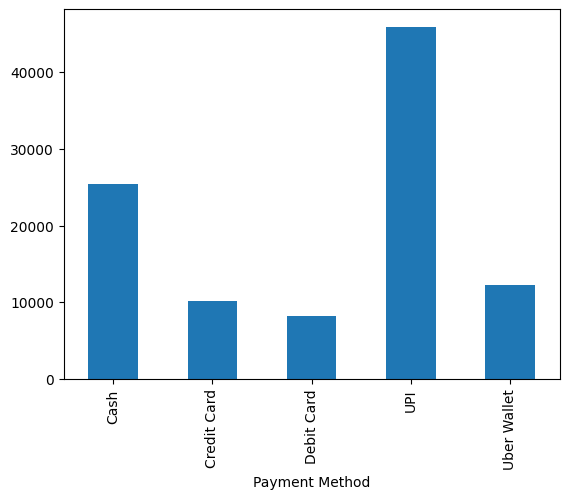

In [17]:
df.groupby("Payment Method")["Date"].count().plot(kind="bar")

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Ride Distance = a (intercept) + b (slope) * Avg CTAT

In [25]:
df_no_na = df[["Ride Distance","Avg CTAT"]].dropna()
df_no_na

,Ride Distance,Avg CTAT
1,5.73,14.0
2,13.58,25.8
3,34.02,28.5
4,48.21,19.6
5,4.85,18.1
...,...,...
149995,40.08,44.4
149996,21.31,30.8
149997,15.93,23.4
149998,45.54,39.6


In [26]:
model = LinearRegression()
model.fit(df_no_na[["Avg CTAT"]], df_no_na[["Ride Distance"]])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
model.coef_

array([[0.15964538]])

In [28]:
# 0.15964538 is the b value or the slope , a bit of a correlation but not convincing